# Системы ОДУ (жесткий вариант). X.9.9

In [226]:
import numpy as np
import scipy.optimize as op
import math
import matplotlib.pyplot as plt

In [227]:
# Система ОДУ
def oregonator(t, y):
    y1, y2, y3 = y
    dy1 = 77.27 * (y2 + y1 * (1 - 8.375e-6 * y1 - y2))
    dy2 = (1 / 77.27) * (y3 - (1 + y1) * y2)
    dy3 = 0.161 * (y1 - y3)
    return np.array([dy1, dy2, dy3])


y0 = [2, 0, 0]
t_bdf = np.linspace(0, 100, 2000)

In [228]:
# Метод Рунге-Кутты 4-го порядка
def runge_kutta_4(f, y0, t):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    
    for i in range(n-1):
        h = t[i+1] - t[i]
        k1 = f(t[i], y[i])
        k2 = f(t[i] + h/2, y[i] + h*k1/2)
        k3 = f(t[i] + h/2, y[i] + h*k2/2)
        k4 = f(t[i] + h, y[i] + h*k3)
        y[i+1] = y[i] + h * (k1 + 2*k2 + 2*k3 + k4) / 6
    
    return y

In [229]:
# Метод 4-го порядка
def bdf_4(f, y0, t):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    
    # Инициализация с помощью Рунге-Кутты 4-го порядка
    y[1:4] = runge_kutta_4(f, y0, t[:5])[2:5]
    
    # Основной цикл для BDF 4-го порядка
    for i in range(3, n-1):
        h = t[i+1] - t[i]
        f1 = f(t[i], y[i])
        f2 = f(t[i-1], y[i-1])
        f3 = f(t[i-2], y[i-2])
        f4 = f(t[i-3], y[i-3])
        y[i+1] = y[i] + h * (55*f1 - 59*f2 + 37*f3 - 9*f4) / 24
    
    return y

In [230]:
solution_bdf_4 = bdf_4(oregonator, y0, t_bdf)

C:\Users\alexs\AppData\Local\Temp\ipykernel_13732\1949732524.py:4: RuntimeWarning: overflow encountered in scalar multiply
  dy1 = 77.27 * (y2 + y1 * (1 - 8.375e-6 * y1 - y2))
C:\Users\alexs\AppData\Local\Temp\ipykernel_13732\1949732524.py:5: RuntimeWarning: overflow encountered in scalar multiply
  dy2 = (1 / 77.27) * (y3 - (1 + y1) * y2)
C:\Users\alexs\AppData\Local\Temp\ipykernel_13732\2193760019.py:17: RuntimeWarning: invalid value encountered in subtract
  y[i+1] = y[i] + h * (55*f1 - 59*f2 + 37*f3 - 9*f4) / 24


## Неявный метод Рунге-Кутта 3 порядка и выше

In [231]:
def implicitRK3(t0, y0, h, f, n_iter=None, t_end=None):
    if n_iter is None:
        n_iter = math.ceil((t_end - t0) / h)

    t = t0
    y = y0
    result_t = [t]
    result_y = [y]

    for _ in range(n_iter):
        k1 = op.fsolve(lambda arg: arg - f(t + (1/3)*h, y + h*(1/3 * arg)), y, xtol=1e-10, maxfev=500)
        k2 = op.fsolve(lambda arg: arg - f(t + h, y + h*(1/3*k1 + 2/3*arg)), y, xtol=1e-10, maxfev=500)
        k3 = op.fsolve(lambda arg: arg - f(t + h, y + h*(arg)), y, xtol=1e-10, maxfev=500)
        y = y + h * (3/4 * k1 + 3/4 * k2 - 1/2 * k3)
        t += h
        result_t.append(t)
        result_y.append(y)

    return np.array(result_t), np.array(result_y)

In [232]:
T0 = 0
y0 = np.array([1.0, 2.0, 3.0])
h = 0.01
T_end = 800

In [233]:
T_vals, Y_vals = implicitRK3(T0, y0, h, oregonator, t_end=T_end)

C:\Users\alexs\AppData\Local\Temp\ipykernel_13732\1300323891.py:13: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  k3 = op.fsolve(lambda arg: arg - f(t + h, y + h*(arg)), y, xtol=1e-10, maxfev=500)
C:\Users\alexs\AppData\Local\Temp\ipykernel_13732\1300323891.py:11: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  k1 = op.fsolve(lambda arg: arg - f(t + (1/3)*h, y + h*(1/3 * arg)), y, xtol=1e-10, maxfev=500)
C:\Users\alexs\AppData\Local\Temp\ipykernel_13732\1300323891.py:12: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  k2 = op.fsolve(lambda arg: arg - f(t + h, y + h*(1/3*k1 + 2/3*arg)), y, xtol=1e-10, maxfev=500)


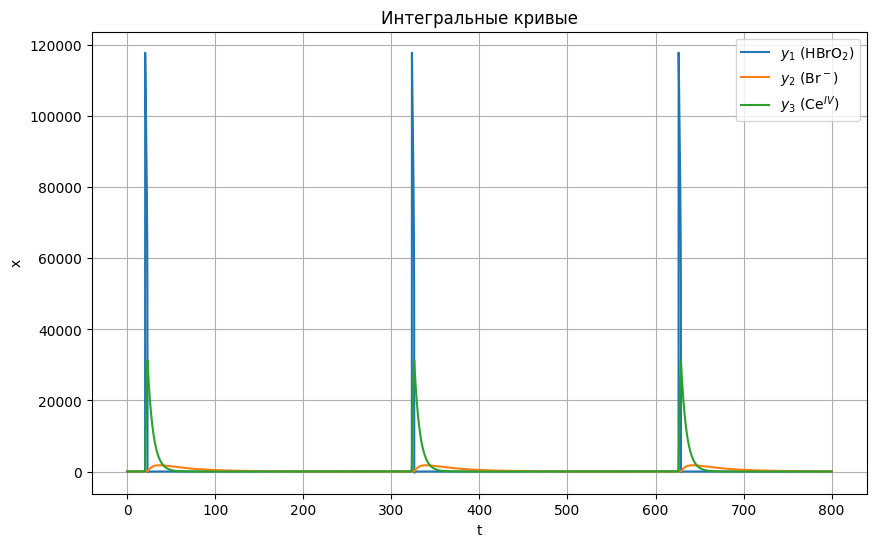

In [234]:
# Построение графиков
plt.figure(figsize=(10, 6))
plt.plot(T_vals, Y_vals[:, 0], label="$y_1$ (HBrO$_2$)")
plt.plot(T_vals, Y_vals[:, 1], label="$y_2$ (Br$^-$)")
plt.plot(T_vals, Y_vals[:, 2], label="$y_3$ (Ce$^{IV}$)")
plt.xlabel("t")
plt.ylabel("x")
plt.legend()
plt.grid()
plt.title("Интегральные кривые")
plt.show()

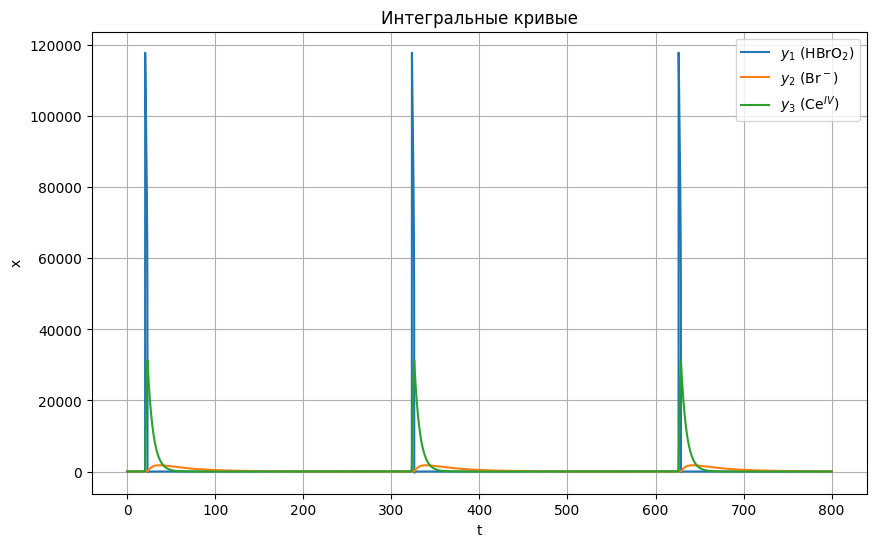

In [235]:
# Построение графиков
plt.figure(figsize=(10, 6))
plt.plot(T_vals, Y_vals[:, 0], label="$y_1$ (HBrO$_2$)")
plt.plot(T_vals, Y_vals[:, 1], label="$y_2$ (Br$^-$)")
plt.plot(T_vals, Y_vals[:, 2], label="$y_3$ (Ce$^{IV}$)")
plt.xlabel("t")
plt.ylabel("x")
plt.legend()
plt.grid()
plt.title("Интегральные кривые")
plt.show()

## Метод Розенброка

In [236]:
# Метод Розенброка 2-го порядка
def rosenbrock2(t0, y0, h, f, n_iter=None, t_end=None):
    if n_iter is None:
        n_iter = math.ceil((t_end - t0) / h)

    t = t0
    y = y0
    result_t = [t]
    result_y = [y]

    for _ in range(n_iter):
        y_pred = y + h * f(t, y)
        
        y_corr = op.fsolve(lambda arg: arg - y - h * f(t + h, arg), y_pred, xtol=1e-6, maxfev=500)
        y = y_corr
        t += h
        result_t.append(t)
        result_y.append(y)

    return np.array(result_t), np.array(result_y)


In [237]:
# Метод Розенброка 3-го порядка
def rosenbrock3(t0, y0, h, f, n_iter=None, t_end=None):
    if n_iter is None:
        n_iter = math.ceil((t_end - t0) / h)

    t = t0
    y = y0
    result_t = [t]
    result_y = [y]

    for _ in range(n_iter):
        y_pred = y + h * f(t, y) + (h**2) * (1 / 2) * f(t + h, y)
        
        y_corr = op.fsolve(lambda arg: arg - y - h * f(t + h, arg) - (h**2) * (1 / 2) * f(t + h, arg), y_pred, xtol=1e-6, maxfev=500)
        y = y_corr
        t += h
        result_t.append(t)
        result_y.append(y)

    return np.array(result_t), np.array(result_y)

In [238]:
T_vals, Y_vals = rosenbrock2(T0, y0, h, oregonator, t_end=T_end)

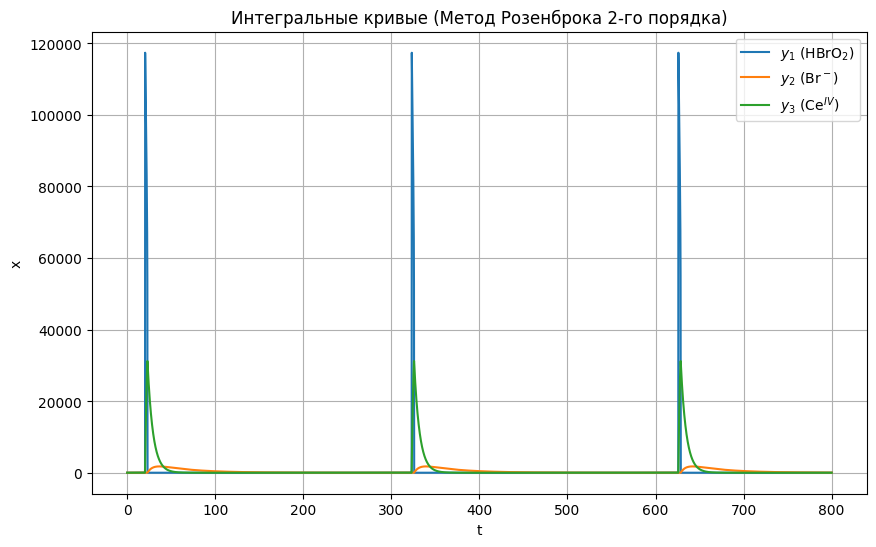

In [239]:
plt.figure(figsize=(10, 6))
plt.plot(T_vals, Y_vals[:, 0], label="$y_1$ (HBrO$_2$)")
plt.plot(T_vals, Y_vals[:, 1], label="$y_2$ (Br$^-$)")
plt.plot(T_vals, Y_vals[:, 2], label="$y_3$ (Ce$^{IV}$)")
plt.xlabel("t")
plt.ylabel("x")
plt.legend()
plt.grid()
plt.title("Интегральные кривые (Метод Розенброка 2-го порядка)")
plt.show()

In [240]:
T_vals, Y_vals = rosenbrock3(T0, y0, h, oregonator, t_end=T_end)

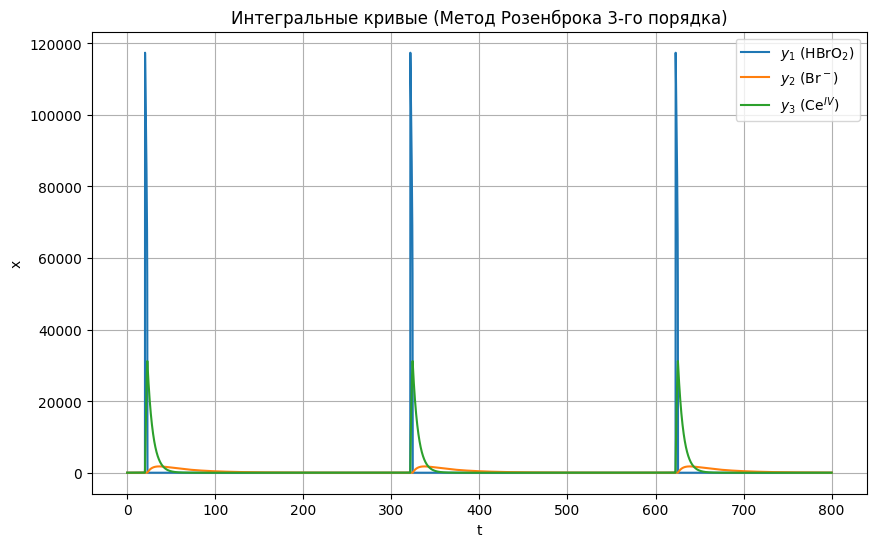

In [241]:
plt.figure(figsize=(10, 6))
plt.plot(T_vals, Y_vals[:, 0], label="$y_1$ (HBrO$_2$)")
plt.plot(T_vals, Y_vals[:, 1], label="$y_2$ (Br$^-$)")
plt.plot(T_vals, Y_vals[:, 2], label="$y_3$ (Ce$^{IV}$)")
plt.xlabel("t")
plt.ylabel("x")
plt.legend()
plt.grid()
plt.title("Интегральные кривые (Метод Розенброка 3-го порядка)")
plt.show()

## Метод Гира в представлении Нордсика

In [242]:
def gira_nordsick(t0, y0, h, f, n_iter=None, t_end=None):
    if n_iter is None:
        n_iter = math.ceil((t_end - t0) / h)

    t = t0
    y = y0
    result_t = [t]
    result_y = [y]
    
    y_prev = y0
    y_prev2 = y0

    for _ in range(n_iter):
        y_pred = y + h * f(t, y)

        y_corr = op.fsolve(lambda arg: arg - y - h * f(t + h, arg), y_pred, xtol=1e-6, maxfev=1000)
        y = y_corr
        t += h
        
        y_prev2 = y_prev
        y_prev = y
        
        result_t.append(t)
        result_y.append(y)

    return np.array(result_t), np.array(result_y)

In [243]:
T_vals, Y_vals = gira_nordsick(T0, y0, h, oregonator, t_end=T_end)

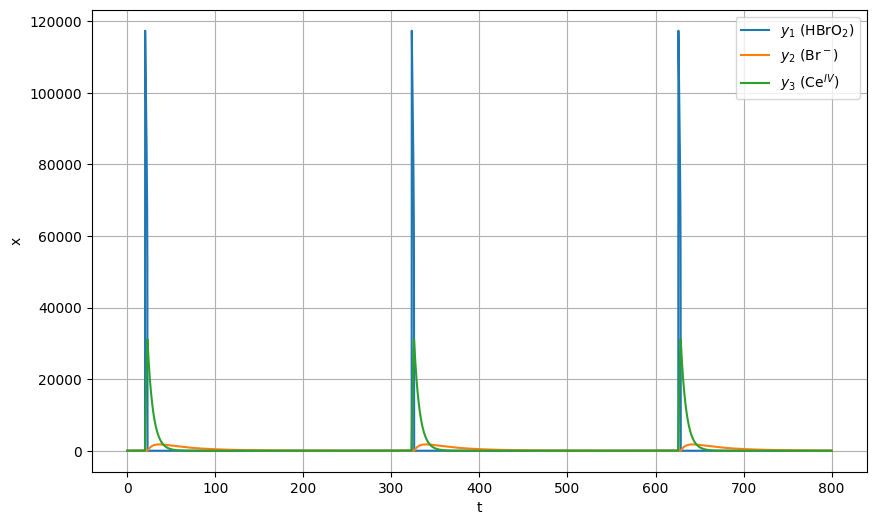

In [244]:
plt.figure(figsize=(10, 6))
plt.plot(T_vals, Y_vals[:, 0], label="$y_1$ (HBrO$_2$)")
plt.plot(T_vals, Y_vals[:, 1], label="$y_2$ (Br$^-$)")
plt.plot(T_vals, Y_vals[:, 2], label="$y_3$ (Ce$^{IV}$)")
plt.xlabel("t")
plt.ylabel("x")
plt.legend()
plt.grid()
plt.show()